# __CIFAR10データセットパラメータチューニング__
__CIFAR10データセットをダウンロードして、CNNでの学習を行う。ハイパーパラメータは以下のとおりである__  
*****
|パラメータ|説明|選択肢|
|:-:|:-:|:--:|
|`--epoch`|エポック数|10で統一| 
|`--activation`|活性化関数|`ReLU`,`ELU`|  
|`--optimizer`|最適化手法|`Adam`,`MomentumSGD`|  
|`--weight_decay`|重み減衰|1e-10 ~ 1e-3|  
|`--adam_lr`|adam学習率|1e-5 ~ 1e-1|  
|`--momentum_sgd_lr`|sgd学習率|1e-5 ~ 1e-1|   
|`--mid_units`|結合層のユニット数|100 ~ 500|  
|`--num_layer`|畳み込みの数|3~7|
|`--num_filter`|各層のフィルタ数|16 ~ 128 の list|

各種パラメータを変更しながら、lossやtestの精度がどのように変化するのかを考察する
***
初期パラメータの設定は下表のとおりである。
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1.3452825924268737e-07|
|adam_lr|0.0003348252618961708|
|momentum_sgd_lr|1e-3|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

ここで得られたパラメータを用いて学習を行うと以下のようになる  

[**********] 100.00% (10/10)

20230714 13:46:05
train_loss = 0.6530011924503516
validation_loss = 0.9862566501284367
test_acc = 0.6795249999999999


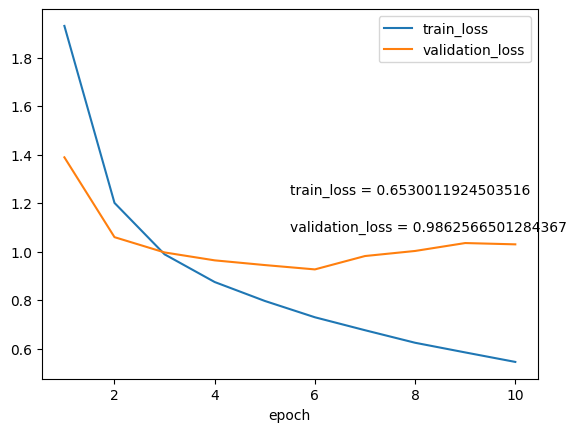

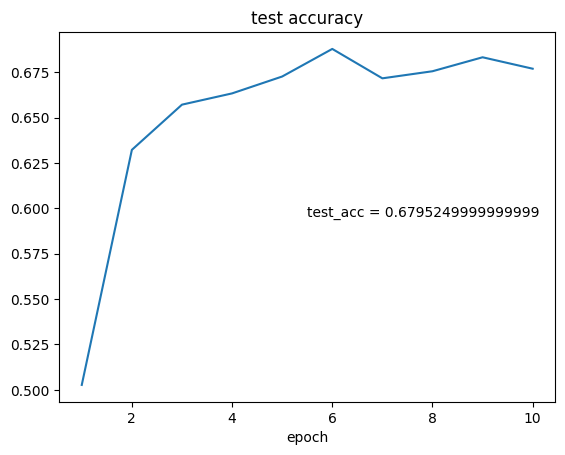

In [9]:
%run ../src/CIFAR10/CIFAR_train.py\
--filename 'result0'

***
activationをeluにしてみる
|パラメータ|値|
|:-|-|
|<span style="color:red;">activation</span>|<span style="color:red;">elu</span>|
|optimizer|Adam|
|weight_decay|1.3452825924268737e-07|
|adam_lr|0.0003348252618961708|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)

20230714 13:51:16
train_loss = 1.0106510555629105
validation_loss = 1.2258189955244307
test_acc = 0.596175


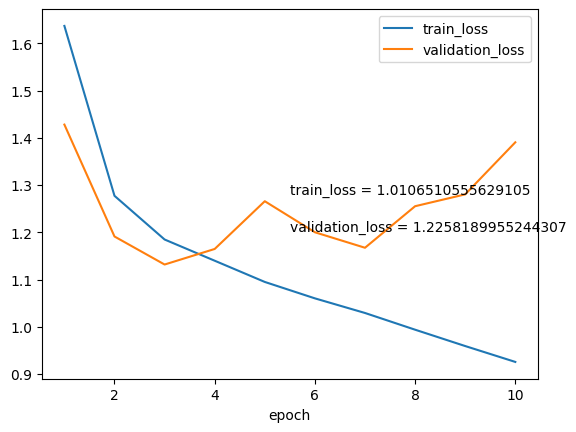

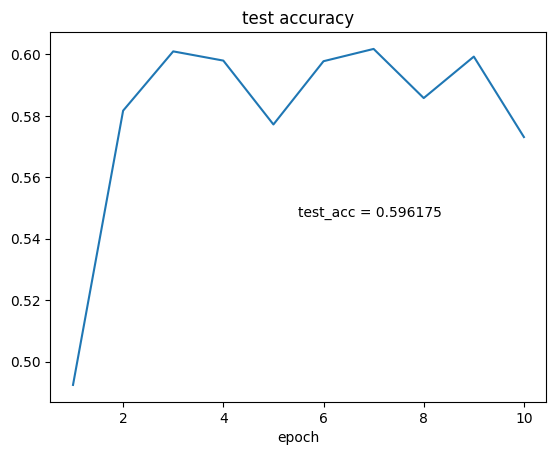

In [10]:
%run ../src/CIFAR10/CIFAR_train.py\
--activation elu --filename 'result_elu'

精度が低下している
****
optimizerをAdamからMomentumSGDに変更してみる

|パラメータ|値|
|:-|-|
|activation|ReLU|
|<span style="color:red;">optimizer</span>|<span style="color:red;">MomentumSGD</span>|
|weight_decay|1.3452825924268737e-07|
|momentum_sgd_lr|1e-3|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)

20230714 14:30:56
train_loss = 1.1125402871878447
validation_loss = 1.1281507529310884
test_acc = 0.5991


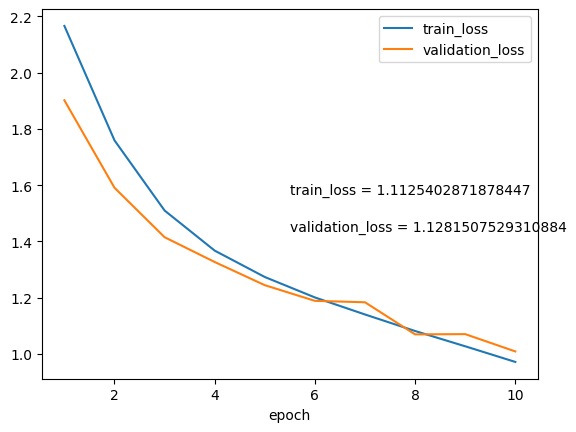

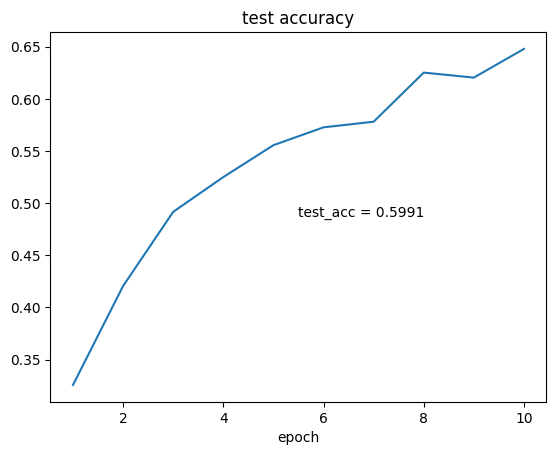

In [18]:
%run ../src/CIFAR10/CIFAR_train.py\
--optimizer MomentumSGD --filename 'result_MomentumSGD' --momentum_sgd_lr 1e-4

***
重み減衰を1e-09に縮小させてみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|<span style="color:red;">weight_decay</span>|<span style="color:red;">1e-09</span>|
|adam_lr|0.0003348252618961708|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)

20230714 14:00:46
train_loss = 0.4573875215856959
validation_loss = 1.0235600355363705
test_acc = 0.698425


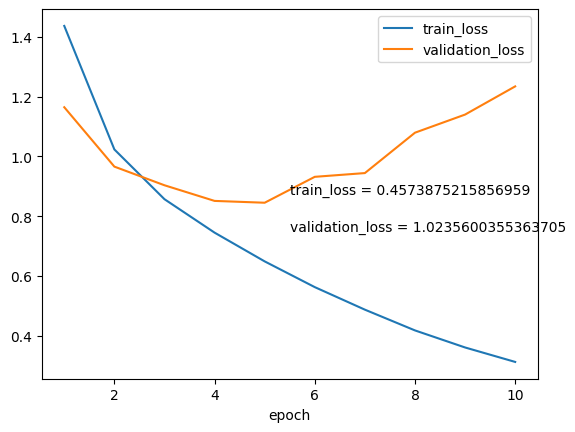

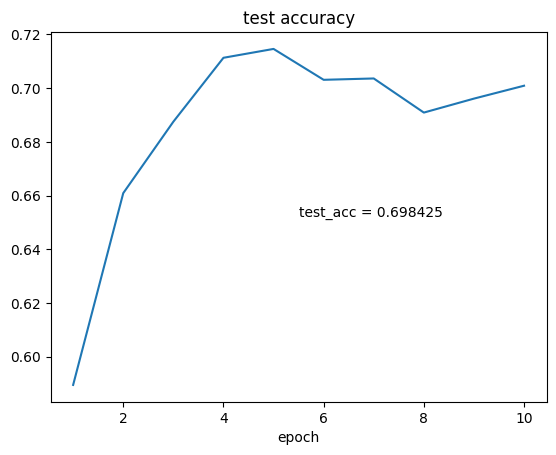

In [12]:
%run ../src/CIFAR10/CIFAR_train.py\
--weight_decay 1e-9 --filename 'result_weight_decay_1e-9'

***
重み減衰を1e-02に変更して大きくしてみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|<span style="color:red;">weight_decay</span>|<span style="color:red;">1e-02</span>|
|adam_lr|0.0003348252618961708|
|mid_units|500|
|num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)

20230714 14:05:57
train_loss = 1.2957549840685725
validation_loss = 1.289885212637484
test_acc = 0.5347249999999999


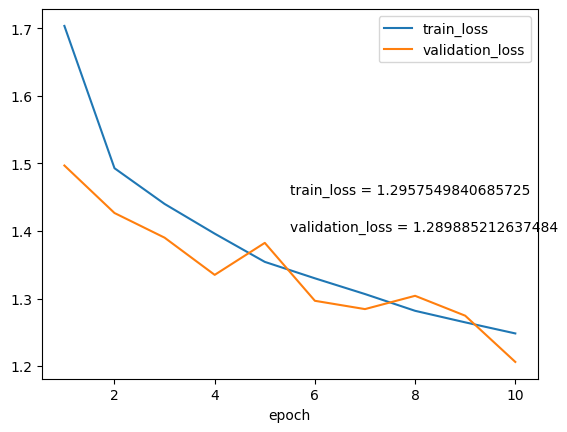

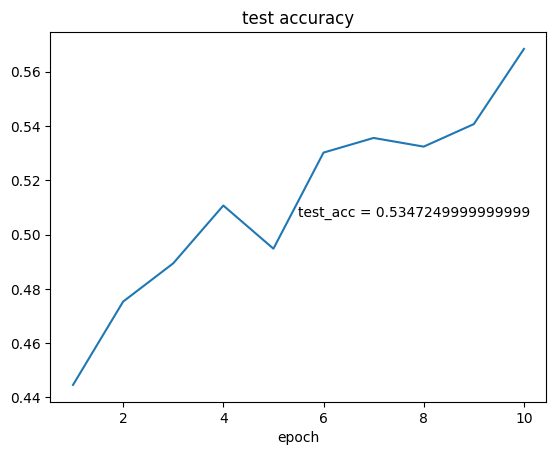

In [13]:
%run ../src/CIFAR10/CIFAR_train.py\
--weight_decay 1e-2 --filename 'result_weight_decay_1e-2'

***
adam学習率を1e-04に変更して小さくしてみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1e-06|
|<span style="color:red;">adam_lr</span>|<span style="color:red;">1e-4</span>|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)

20230714 14:11:07
train_loss = 0.40257872018764507
validation_loss = 0.8324201574949989
test_acc = 0.7420500000000001


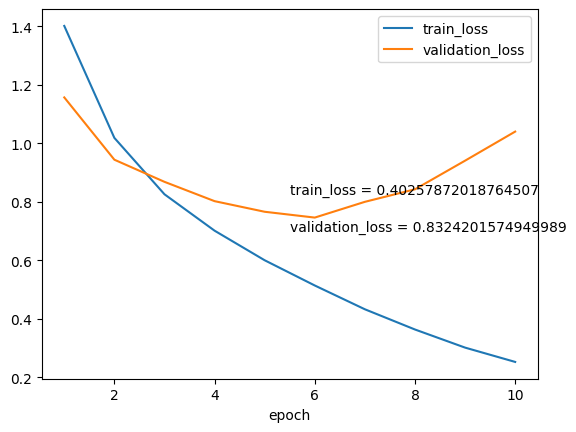

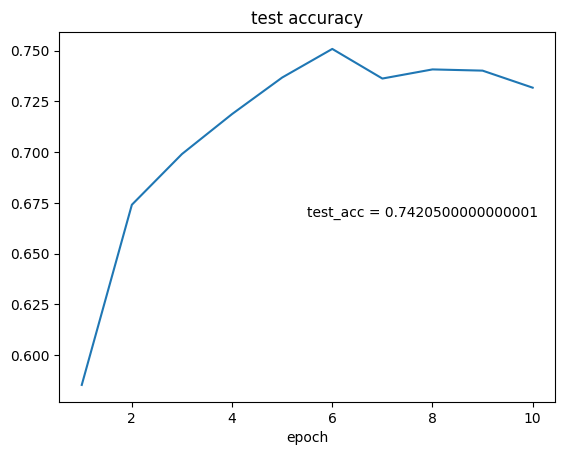

In [14]:
%run ../src/CIFAR10/CIFAR_train.py\
--adam_lr 1e-4 --filename 'result_adam_lr_1e-4'

***
adam学習率を1e-02に変更して大きくしてみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1e-06|
|<span style="color:red;">adam_lr</span>|<span style="color:red;">1e-2</span>|
|mid_units|500|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)

20230714 14:16:19
train_loss = 2.3483143834114077
validation_loss = 2.3567652777075767
test_acc = 0.1


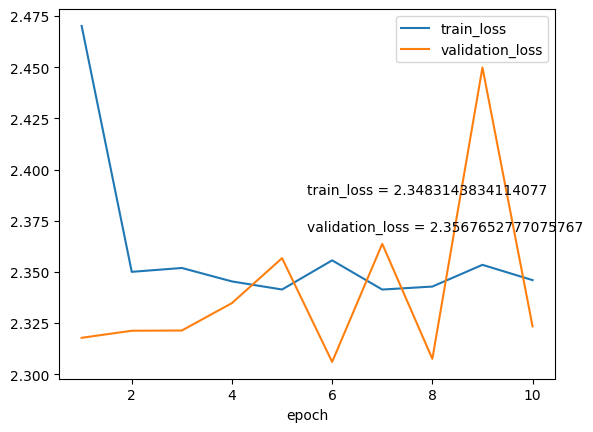

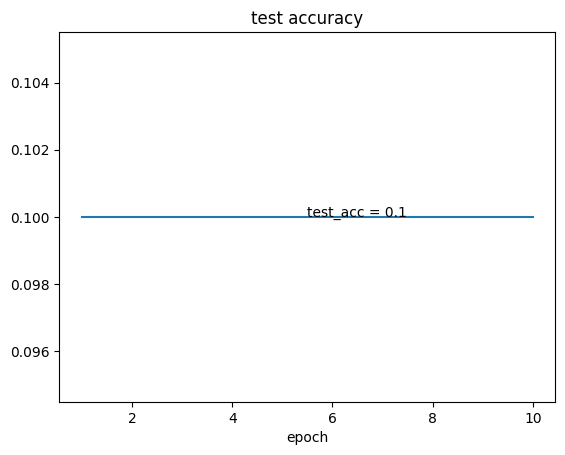

In [15]:
%run ../src/CIFAR10/CIFAR_train.py\
--adam_lr 1e-2 --filename 'result_adam_lr_1e-2'

***
num_unitsを半分の250にしてみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1.3452825924268737e-07|
|adam_lr|0.0003348252618961708|
|<span style="color:red;">mid_units</span>|<span style="color:red;">250</span>|
|--num_layer|5|
|num_filter|112.48.80.96.112|

[**********] 100.00% (10/10)

20230714 14:50:47
train_loss = 0.4505425103376597
validation_loss = 0.9924864999296642
test_acc = 0.7061499999999999


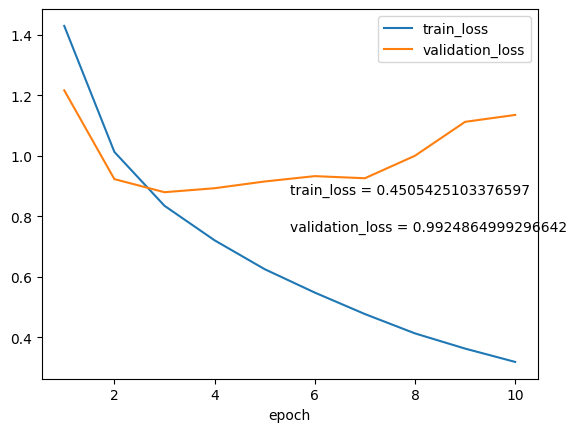

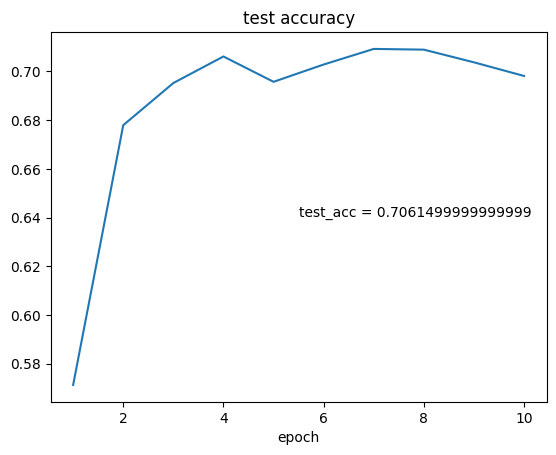

In [21]:
%run ../src/CIFAR10/CIFAR_train.py\
--mid_units 250 --filename 'result_num_units_250'

***
畳み込み層の数を3にへらしてみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1.3452825924268737e-07|
|adam_lr|0.0003348252618961708|
|mid_units|500|
|<span style="color:red;">--num_layer</span>|<span style="color:red;">3</span>|
|<span style="color:red;">num_filter</span>|<span style="color:red;">112.96.112</span>|

[**********] 100.00% (10/10)

20230714 14:21:40
train_loss = 0.34146564338275315
validation_loss = 1.281751697261852
test_acc = 0.6792


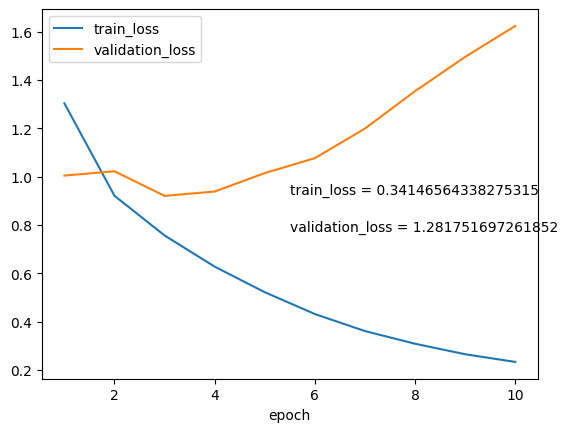

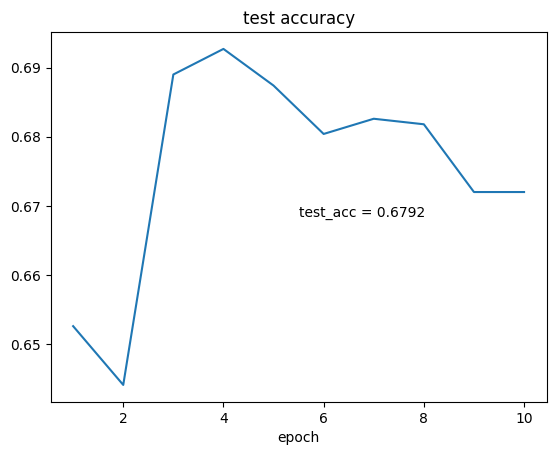

In [16]:
%run ../src/CIFAR10/CIFAR_train.py\
--num_layer 3 --num_filter 112.96.112 --filename 'result_num_layer_3'

***
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1.3452825924268737e-07|
|adam_lr|0.0003348252618961708|
|mid_units|500|
|<span style="color:red;">--num_layer</span>|<span style="color:red;">7</span>|
|<span style="color:red;">num_filter</span>|<span style="color:red;">112.16.32.48.80.96.112</span>|

[**********] 100.00% (10/10)

20230714 14:26:33
train_loss = 0.694232195196923
validation_loss = 0.9492961867039791
test_acc = 0.6824


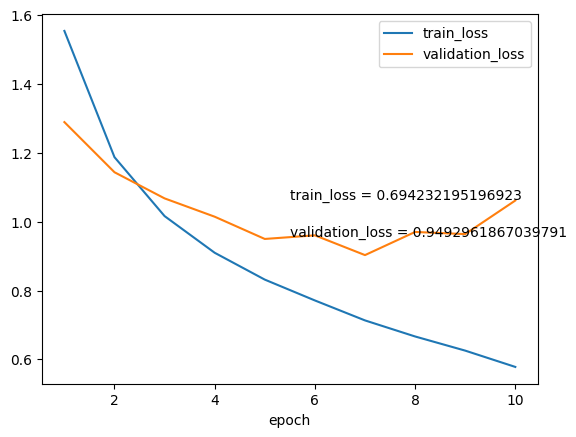

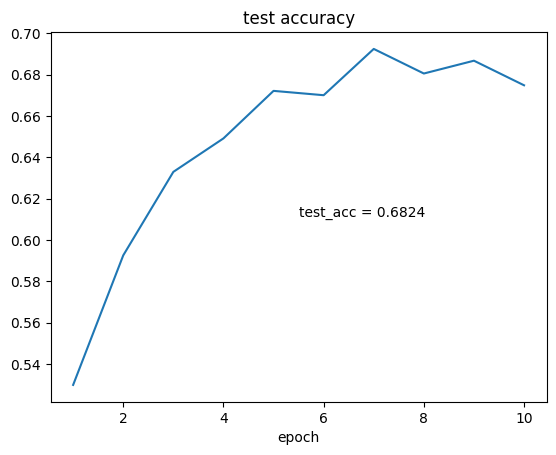

In [17]:
%run ../src/CIFAR10/CIFAR_train.py\
--num_layer 7 --num_filter 112.16.32.48.80.96.112 --filename 'result_num_layer_7'